<h2><b>Import các thư viện

In [1]:
#import các thư viện cần dùng

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# bổ sung nếu cần 
from numpy import random

<h2><b>Khám phá dữ liệu </b></h2>

<b>Đầu tiên đọc file <b>games_info.csv</b> vào một Dataframe tên là `df_games_info`.</b>

In [2]:
#   YOUR CODE HEAR
df_games_info = pd.read_csv('../data/games_info.csv')
df_games_info.head(5)

,Title,Release date,Platform,Other platforms,Publisher,Developer,Genres,Rating,Number of players,Metascore,Number of critic reviews,User Score,Number of user reviews
0,The Legend of Zelda: Ocarina of Time,"Nov 23, 1998",Nintendo 64,NaN,Nintendo,Nintendo,"Action Adventure,Fantasy",E,1 Player,99.0,22,9.1,7359
1,Tony Hawk's Pro Skater 2,"Sep 20, 2000",PlayStation,"iPhone/iPad,PC",Activision,Neversoft Entertainment,"Sports,Alternative,Skateboarding",T,1-2,98.0,19,7.4,845
2,Grand Theft Auto IV,"Apr 29, 2008",PlayStation 3,"PC,Xbox 360",Rockstar Games,Rockstar North,"Action Adventure,Modern,Modern,Open-World",M,1 Player,98.0,64,7.8,4735
3,SoulCalibur,"Sep 8, 1999",Dreamcast,NaN,Namco,Namco,"Action,Fighting,3D",T,1-2,98.0,24,8.4,394
4,Grand Theft Auto IV,"Apr 29, 2008",Xbox 360,"PC,PlayStation 3",Rockstar Games,Rockstar North,"Action Adventure,Modern,Modern,Open-World",M,1 Player,98.0,86,8.0,3671


<b>Dữ liệu gồm bao nhiêu dòng và cột, lưu số dòng và số cột vào 2 biến `num_rows` và `num_cols`.</b>

In [3]:
#   YOUR CODE HEAR
num_rows = df_games_info.shape[0]
num_cols = df_games_info.shape[1]
print(num_cols)
print(num_rows)

13
1498


<b>Các dòng của dữ liệu có bị lặp không, lưu vào biến `have_duplicated_rows` là `False` nếu không lặp và ngược lại.</b>

In [4]:
#   YOUR CODE HEAR
have_duplicated_rows = False
if df_games_info[df_games_info.duplicated()].empty == True:
    have_duplicated_rows == True
print(have_duplicated_rows)

False


<b>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?</b>

Lưu giá trị của các kiểu dữ liệu vào biến `col_dtypes`.

In [5]:
#   YOUR CODE HEAR
df_games_info.dtypes
col_dtypes = df_games_info.dtypes
print(col_dtypes)

Title                        object
Release date                 object
Platform                     object
Other platforms              object
Publisher                    object
Developer                    object
Genres                       object
Rating                       object
Number of players            object
Metascore                   float64
Number of critic reviews      int64
User Score                  float64
Number of user reviews        int64
dtype: object


<b>Ý nghĩa của các dòng và các cột</b> 

<b>Tìm kiếm kiểu dữ liệu thật sự của các cột có dtype là object.</b>

In [6]:
# YOUR CODE HERE
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x : dtypes.add(type(x)))
    return dtypes

print(open_object_dtype(df_games_info['Number of players']))

{<class 'float'>, <class 'str'>}


<b>Các vấn đề cần tiền xử lí</b>
- Cột Release date đang có kiểu dữ liệu là `str`, việc cần làm là đổi nó sang kiểu `datetime`.
- Cột Rating để biểu diễn lứa tuổi phù hợp đang có 2 kiểu dữ liệu là `str` và `float`, việc cần làm là đổi cột này sang dạng `int`.
- Cột Number of players đang có 2 kiểu dữ liệu là `str` và `float`, việc cần làm là đổi cột này sang dạng `int` vì số lượng người chơi phải là số nguyên dương (Ở biến này có những chuỗi phức tạp nên ta sẽ tìm hiểu sau hơn ở phần tiền xử lí bên dưới).

<h2><b>Tiền xử lí dữ liệu</b><h2>

<b>Chuyển cột Release date sang kiểu dữ liệu datetime.

In [7]:
# YOUR CODE HEAR
df_games_info['Release date'] = pd.to_datetime(df_games_info['Release date'],format="%b %d, %Y")
print(df_games_info['Release date'].dt.year)

0       1998
1       2000
2       2008
3       1999
4       2008
        ... 
1493    2010
1494    2004
1495    2011
1496    2003
1497    2003
Name: Release date, Length: 1498, dtype: int64


<b>Chuyển cột Rating sang kiểu dữ liệu int. Ta quy định như sau:</b>

Trong cột này có các giá trị ['E' 'T' 'M' 'E10+' nan 'K-A' 'AO']

- E là 3 tuổi trở lên nên quy định trong tệp này là 3

- T là 13 tuổi trở lên nên quy định trong tệp này là 13

- M là từ 17 tuổi trở lên nên quy định trong tệp này là 17

- E10+ là từ từ 10 tuổi trở lên nên quy định trong tệp này là 10

- K-A là từ 6 tuổi nên ta quy trong tệp này là 6

- AO là từ 18 nên quy định trong tệp này là 18

- Với nan ta quy định là -1



In [8]:
# YOUR CODE HEAR
def replace_rating(df,val_old,val_new):
    return df.replace([val_old], val_new)

df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'E',3)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'T',13)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'M',17)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'E10+',10)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'K-A',6)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'AO',18)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],np.nan,-1)

df_games_info = df_games_info.astype({'Rating':'int'})
print(df_games_info['Rating'])

0        3
1       13
2       17
3       13
4       17
        ..
1493     3
1494    13
1495    17
1496     3
1497     3
Name: Rating, Length: 1498, dtype: int32


<b>Ở đây ta tập trung tiền xử lí cho cột Number of players.</b>
- Đầu tiên hãy kiểm tra xem cột này có bao nhiêu giá trị khác nhau.
- Sau đó ta sẽ quy định lại giá trị int tương ứng cho giá trị đó.

Chúng ta sẽ kiểm tra số lượng giá trị khác nhau và lưu vào một list là `unique_values`.

In [9]:
# YOUR CODE HEAR
unique_values = df_games_info['Number of players'].unique()
print(unique_values)

['1 Player' '1-2' 'No Online Multiplayer' 'Up to 32' 'Up to 30' 'Up to 16'
 nan '1-4' 'Up to 4' 'Online Multiplayer' 'Up to 6' '1-16' 'Up to 8' '2'
 'Up to 18' '1-8' '8  Online' '2  Online' '4  Online' '1-32' 'Up to 10'
 'Up to 40' '16  Online' 'Massively Multiplayer' 'Up to 12' '24  Online'
 '6  Online' '1-12' 'Up to 20' 'Up to 5' '64+' 'Up to 22' 'Up to 60' '1-6'
 'Up to 24' 'Up to 3' '1-10' '64  Online' 'Up to 64' '12  Online'
 '10  Online' '32  Online']


- Với các giá trị có dạng `1-2, 1-16,...` ta chuyển nó thành giá trị của số lớn nhất bên phải.
- Với các giá trị có dạng `Up to 32` ta chuyển nó thành 32.
- Với các giá trị có dạng `No Online Multiplayer` ta chuyển nó thành 2.
- Với các giá trị có dạng `Massively Multiplayer` ta chuyển nó thành giá trị đoạn [1000,inf]
- Với các giá trị có dạng `Online Multiplayer` ta chuyển nó thành giá trị đoạn [2,100]
- Với các giá trị có dạng `Online` ta chuyển nó thành giá trị đoạn [2,50]
- Với các giá trị có dạng `64+` ta chuyển nó thành một giá trị đoạn [64,200]
- Với các giá trị có dạng `1 Player` ta chuyển nó thành 1
- Với giá trị `nan` ta cho bằng np.nan


In [10]:

def replace_num_of_player(value):
    if str(value).find('-') != -1:
        return int(value[value.find('-') + 1])
    elif str(value).find('Up to ') != -1:
        return int(value[6:8])
    elif str(value).find('  Online') != -1:
        return int(value[0: len(value) - 7])
    elif value =='No Online Multiplayer':
        return 1
    elif value == 'Massively Multiplayer':
        return [1000,np.inf]
    elif value == 'Online Multiplayer':
        return [2,100]
    elif value == 'Online':
        return [2,50]
    elif value == '64+':
        return [64,200]
    elif value == '1 Player':
        return 1
    else:
        return value
    

for i in range(len(df_games_info['Number of players'])):
    df_games_info['Number of players'].at[i] = replace_num_of_player(df_games_info['Number of players'].at[i])
df_games_info['Number of players'] = df_games_info['Number of players'].replace([np.nan],'0')
print(df_games_info['Number of players'])

0       1
1       2
2       1
3       2
4       1
       ..
1493    0
1494    1
1495    2
1496    4
1497    2
Name: Number of players, Length: 1498, dtype: object


Sau khi đã xong chúng ta tiếp tục các bước khám phá dữ liệu.

<h2><b>Khám phá dữ liệu (Tiếp tục).</b></h2>

<b>Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?</b>

Các cột dạng numeric là: Metascore, Number of critic reviews, User Score, Number of user reviews.

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Bạn lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 5 cột là "Metascore", "Number of critic reviews", "User Score", "Number of user reviews".

In [11]:
# YOUR CODE HERE
nume_col_profiles_df = pd.DataFrame(
    index=pd.Index(['missing_ratio', 'min','max']),
)
def col_profile(df):
    missing_ratio = (df.isnull().sum() / df.shape[0]) * 100
    min = df.min()
    max = df.max()
    result = [missing_ratio,min,max]
    return result

    
nume_col_profiles_df['Metascore'] = col_profile(df_games_info['Metascore'])
nume_col_profiles_df['Number of critic reviews'] = col_profile(df_games_info['Number of critic reviews'])
nume_col_profiles_df['User Score'] = col_profile(df_games_info['User Score'])
nume_col_profiles_df['Number of user reviews'] = col_profile(df_games_info['Number of user reviews'])


print(nume_col_profiles_df)

               Metascore  Number of critic reviews  User Score  \
missing_ratio        0.0                       0.0         0.0   
min                 86.0                       7.0         2.1   
max                 99.0                     132.0         9.6   

               Number of user reviews  
missing_ratio                     0.0  
min                               4.0  
max                          159969.0  


<b>Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?</b>

Với mỗi cột dạng categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 7 cột là "Title", "Release date", "Platform", "Other platforms", "Publisher", "Developer", "Genres"

In [12]:
# YOUR CODE HERE
cate_col_profiles_df = pd.DataFrame(
    index = pd.Index(['missing_ratio','num_diff_vals','diff_vals'])
)
def cate_col_profile(df):
    missing_ratio = (df.isnull().sum() / df.shape[0]) * 100
    num_diff_vals = df.nunique()
    temp = df
    temp = temp.dropna()
    diff_vals = set(temp)
    result = [missing_ratio,num_diff_vals,diff_vals]
    return result
cate_col_profiles_df['Title'] = cate_col_profile(df_games_info['Title'])
cate_col_profiles_df['Release date'] = cate_col_profile(df_games_info['Release date'])
cate_col_profiles_df['Platform'] = cate_col_profile(df_games_info['Platform'])
cate_col_profiles_df['Other platforms'] = cate_col_profile(df_games_info['Other platforms'])
cate_col_profiles_df['Publisher'] = cate_col_profile(df_games_info['Publisher'])
cate_col_profiles_df['Developer'] = cate_col_profile(df_games_info['Developer'])
cate_col_profiles_df['Genres'] = cate_col_profile(df_games_info['Genres'])

print(cate_col_profiles_df)

                                                           Title  \
missing_ratio                                                0.0   
num_diff_vals                                               1042   
diff_vals      {F1 2016, PixelJunk Monsters Deluxe, Immortali...   

                                                    Release date  \
missing_ratio                                                0.0   
num_diff_vals                                               1019   
diff_vals      {2020-08-14 00:00:00, 2004-08-03 00:00:00, 202...   

                                                        Platform  \
missing_ratio                                                0.0   
num_diff_vals                                                 21   
diff_vals      {PSP, DS, PlayStation 3, Xbox, PlayStation 4, ...   

                                                 Other platforms  \
missing_ratio                                          32.042724   
num_diff_vals                                

## Đặt câu hỏi

**Câu hỏi 1: Top 10 thể loại game nào được người chơi đánh giá cao nhất?**

Điểm người chơi đánh giá của mỗi thể loại game sẽ được tính bằng trung bình cộng của User Score các game mang thể loại đó.

Bây giờ, sẽ là bước thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:
- Bước 1: Đưa chuỗi các thể loại game trong cột `Genres` sang kiểu list.
- Bước 2: Với mỗi thể loại game trong list sẽ được tách thành một dòng.
- Bước 3: Tính điểm trung bình bằng cách tính tổng điểm User Score / số lượng của mỗi thể loại game

In [13]:
df = df_games_info.copy()

df["Genres"] = df.Genres.apply(lambda x: x[:].split(','))
df = df.explode('Genres')

sr1 = df.groupby(["Genres"])["User Score"].sum()
sr2 = df.groupby(["Genres"]).size()

user_score_for_each_game_genre = sr1/sr2
user_score_for_each_game_genre = user_score_for_each_game_genre.sort_values(ascending = False)

user_score_for_each_game_genre.head(10) 

Genres
Horror                   8.676471
Military                 8.650000
Kart                     8.650000
Other                    8.600000
Breeding/Constructing    8.600000
Command                  8.536364
Snowboarding             8.514286
Space                    8.500000
Tycoon                   8.500000
PC-style RPG             8.495833
dtype: float64

**Trực quan hóa kết quả**

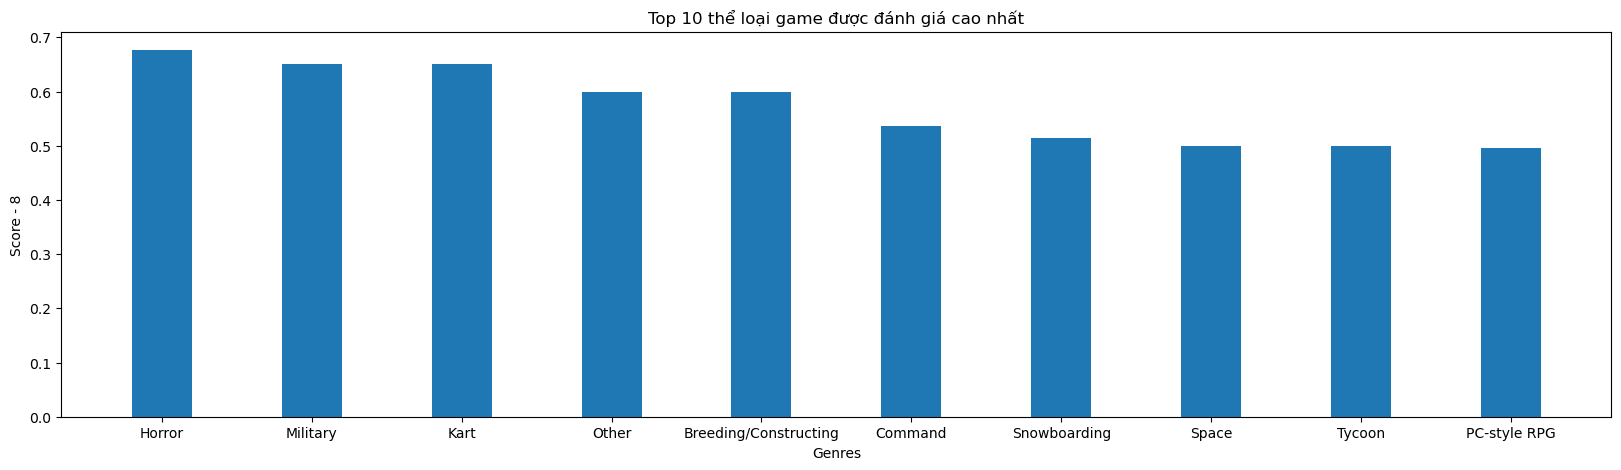

In [14]:
ticks = user_score_for_each_game_genre.head(10).index.to_list()
score = user_score_for_each_game_genre.head(10).values
score = score - 8 #Trừ đi 8 để kết quả trực quan dễ nhìn hơn
fig = plt.figure(figsize = (20, 5))
plt.bar(ticks, score, width = 0.4)

plt.xlabel('Genres')
plt.ylabel('Score - 8')
plt.title('Top 10 thể loại game được đánh giá cao nhất')
    
plt.show()

Trả lời được câu hỏi này nhằm giúp người chơi có thể chọn được những thể loại game hay một cách nhanh chóng. Đồng thời nhà phát triển game cũng có thể tập trung tạo ra các thể loại game này để dễ dàng tiếp cận với nhiều người chơi hơn.

**Câu hỏi 2: Games được đánh giá cao nhất và thấp nhất trên nền tảng PC qua từng năm**

Điểm của một game sẽ được tính bằng (`Metascore` + 10*`User Score`)/2

Bây giờ, sẽ là bước thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:
- Bước 1: Lọc ra những game trên nền tảng PC.
- Bước 2: Gom nhóm theo từng năm.
- Bước 3: Tính điểm của mỗi game. Đối với một số game xuất hiện nhiều lần sẽ được lấy trung bình cộng của `Metascore` và `User Score`

In [15]:
df = df_games_info.copy()

df["Other platforms"] = df["Other platforms"].fillna('No other platforms')

df['All platforms'] = df['Platform'] + ',' + df['Other platforms']

df["All platforms"] = df["All platforms"].apply(lambda x: x[:].split(','))
df = df.explode('All platforms')

df_PC = df.loc[df["All platforms"] == "PC"]

df_PC = df_PC[["Title", "Platform", "Other platforms", "Release date", "Genres", "Metascore", "User Score"]]
df_PC['Year'] = df_PC["Release date"].dt.year

metascore_sr1 = df_PC.groupby(['Year', 'Title', 'Genres'])['Metascore'].sum()
metascore_sr2 = df_PC.groupby(['Year', 'Title', 'Genres'])['Metascore'].size()

userscore_sr1 = df_PC.groupby(['Year', 'Title', 'Genres'])['User Score'].sum()
userscore_sr2 = df_PC.groupby(['Year', 'Title', 'Genres'])['User Score'].size()

metascore_each_game_pc = metascore_sr1/metascore_sr2
userscore_each_game_pc = userscore_sr1/userscore_sr2

score_for_each_game = (metascore_each_game_pc + 10*userscore_each_game_pc)/2

highest_rated_pc_game = score_for_each_game.loc[score_for_each_game.groupby('Year').idxmax()]
lowest_rated_pc_game = score_for_each_game.loc[score_for_each_game.groupby('Year').idxmin()]

In [16]:
pd.DataFrame(highest_rated_pc_game)

,,,0
Year,Title,Genres,
1996,Sid Meier's Civilization II,"Strategy,Turn-Based,Historic,General,Historic,4X",91.000000
1997,Final Fantasy VII,"Role-Playing,Console-style RPG",90.500000
1998,Half-Life,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci-Fi,Arcade",93.500000
1999,Resident Evil 3: Nemesis,"Action Adventure,Survival",93.500000
2000,Baldur's Gate II: Shadows of Amn,"Role-Playing,PC-style RPG,PC-style RPG,Western-Style",93.000000
2001,Halo: Combat Evolved,"Action,Shooter,First-Person,Sci-Fi",92.000000
2002,Resident Evil (2002),"Action Adventure,Horror",93.500000
2003,Star Wars: Knights of the Old Republic,"Role-Playing,Third-Person",92.500000
2004,Half-Life 2,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci-Fi,Arcade",94.000000


**Trực quan hóa kết quả**

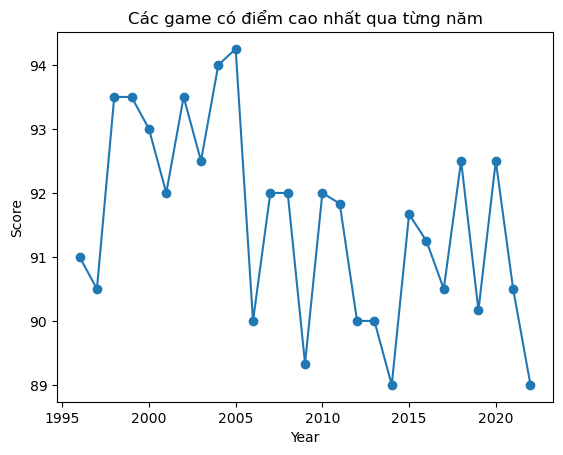

In [17]:
ticks = highest_rated_pc_game.index.get_level_values(0).to_list()
values = list(highest_rated_pc_game.values)
plt.plot(ticks, values, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Các game có điểm cao nhất qua từng năm')
plt.show()

In [18]:
pd.DataFrame(lowest_rated_pc_game)

,,,0
Year,Title,Genres,
1996,Tomb Raider,"Action Adventure,Modern",87.500
1997,Sid Meier's Gettysburg!,"Strategy,Real-Time,Wargame,Real-Time,General",83.000
1998,Shogo: Mobile Armor Division,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci-Fi,Arcade",86.000
1999,Driver,"Driving,Mission-based",83.000
2000,NHL 2001,"Sports,Traditional,Team,Ice Hockey,Sim,Sim",77.500
2001,Madden NFL 2002,"Sports,Traditional,Football,Sim",79.375
2002,Tiger Woods PGA Tour 2003,"Sports,Traditional,Individual,Golf,Sim,Sim",71.000
2003,Madden NFL 2004,"Sports,Traditional,Team,Football,Sim,Sim",81.000
2004,Tiger Woods PGA Tour 2005,"Sports,Traditional,Individual,Golf,Sim,Sim",65.500


**Trực quan hóa kết quả**

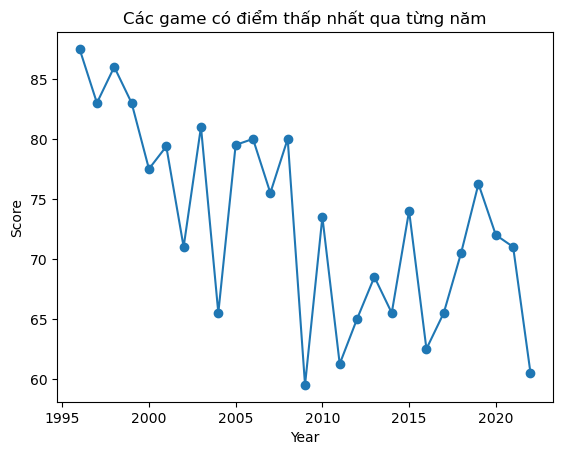

In [19]:
ticks = lowest_rated_pc_game.index.get_level_values(0).to_list()
values = list(lowest_rated_pc_game.values)
plt.plot(ticks, values, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Các game có điểm thấp nhất qua từng năm')
plt.show()

**So sánh 2 kết quả**

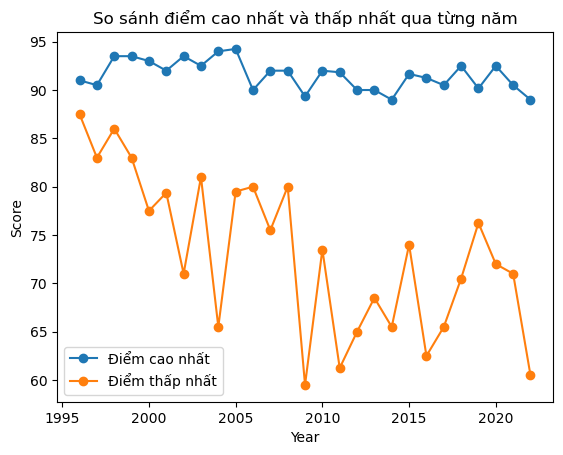

In [20]:
fig, ax = plt.subplots()
ticks1 = highest_rated_pc_game.index.get_level_values(0).to_list()
values1 = list(highest_rated_pc_game.values)

ticks2 = lowest_rated_pc_game.index.get_level_values(0).to_list()
values2 = list(lowest_rated_pc_game.values)

ax.plot(ticks1, values1, marker = 'o', label = "Điểm cao nhất")
ax.plot(ticks2, values2, marker = 'o', label = "Điểm thấp nhất")

ax.legend()
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('So sánh điểm cao nhất và thấp nhất qua từng năm')
plt.show()

Trả lời được câu hỏi này có thể giúp người chơi tìm được những game hay nhất theo năm để chơi. Đồng thời các nhà phát triển game cũng có thể từ các game tiến hành phân tích các thể loại game, ví dụ:
- thể loại game xuất hiện nhiều nhất trong những game có điểm cao nhất là `Shooter` 
- thể loại game xuất hiện nhiều nhất trong những game có điểm thấp nhất là `Sim` 

**Thống kê số lần xuất hiện của từng thể loại game**

**Có điểm cao nhất**

In [21]:
list_genres = highest_rated_pc_game.index.get_level_values(2).to_list()
list_genres_2 = []
for i in list_genres:
    i = i.split(',')
    for j in i:
        list_genres_2.append(j)
list_genres_2.count
for i in set(list_genres_2):
    print(i, list_genres_2.count(i))

General 4
Western-Style 2
Turn-Based 1
4X 1
Adventure 1
Strategy 2
Console-style RPG 1
Shooter 12
Fantasy 2
Linear 2
Action 8
Platformer 2
First-Person 7
Horror 2
Historic 4
3D 2
Sci-Fi 11
Action Adventure 9
PC-style RPG 2
Open-World 2
Massively Multiplayer 1
Third-Person 1
Survival 2
Action RPG 6
Arcade 6
Modern 3
Role-Playing 8
Real-Time 1


**Có điểm thấp nhất**

In [22]:
list_genres = lowest_rated_pc_game.index.get_level_values(2).to_list()
list_genres_2 = []
for i in list_genres:
    i = i.split(',')
    for j in i:
        list_genres_2.append(j)
list_genres_2.count
for i in set(list_genres_2):
    print(i, list_genres_2.count(i))

General 3
Golf 2
Turn-Based 1
Driving 1
4X 1
Adventure 1
Basketball 1
Ice Hockey 1
Strategy 2
Rhythm 1
Shooter 9
Fantasy 5
Action 9
Football 2
Platformer 3
First-Person 6
Soccer 1
Historic 2
Wargame 1
3D 2
Sci-Fi 2
Music 2
Action Adventure 2
2D 1
Massively Multiplayer 3
Miscellaneous 4
Board / Card Game 3
Baseball 1
Action RPG 3
Individual 2
Arcade 6
Modern 3
Mission-based 1
Traditional 7
Team 4
Visual Novel 1
Sim 13
Role-Playing 5
Sports 8
Massively Multiplayer Online 3
Real-Time 2


**Câu hỏi 3: Trong top 10 nhà phát hành phát hành nhiều game nhất thì các game được phát hành bởi nhà phát hành nào được đánh giá cao nhất, và thấp nhất?**

Bây giờ, sẽ là bước thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:
- Bước 1: Lọc ra top 10 nhà phát game bằng cách tính tổng số game phát hành của từng nhát phát hành.
- Bước 2: Tính điểm đánh giá của từng nhà phát hành game bằng cách tính trung bình cộng điểm đánh giá các game do nhà phát hành đó phát hành

In [23]:
df = df_games_info.copy()

df['Year'] = df['Release date'].dt.year
top_publisher = df.groupby(['Publisher']).size().sort_values(ascending = False).head(10)

list_top_publisher = top_publisher.index.to_list()

df_top_publisher = df[df['Publisher'].isin(list_top_publisher)]

publisher_metascore_sr1 = df_top_publisher.groupby(['Publisher'])['Metascore'].sum()
publisher_metascore_sr2 = df_top_publisher.groupby('Publisher')['Metascore'].size()

publisher_userscore_sr1 = df_top_publisher.groupby(['Publisher'])['User Score'].sum()
publisher_userscore_sr2 = df_top_publisher.groupby('Publisher')['User Score'].size()

publisher_metascore = publisher_metascore_sr1/publisher_metascore_sr2
publisher_userscore = publisher_userscore_sr1/publisher_userscore_sr2

publisher_score = (publisher_metascore + publisher_userscore*10)/2

publisher_score.sort_values(ascending = False)

Publisher
Nintendo                  87.813492
Rockstar Games            86.824324
SCEA                      86.400000
Ubisoft                   85.759259
Capcom                    85.370690
Microsoft Game Studios    84.820312
Sega                      84.081081
Electronic Arts           83.554348
Activision                81.881356
EA Sports                 81.473684
dtype: float64

**Trực quan hóa kết quả**

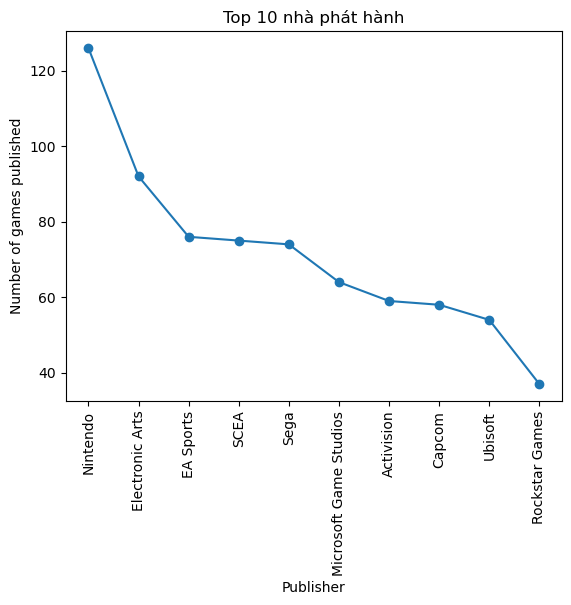

In [24]:
top_publisher
ticks = top_publisher.index.to_list()
values = top_publisher.values
plt.plot(ticks, values, marker = 'o')
plt.xlabel('Publisher')
plt.ylabel('Number of games published')
plt.title('Top 10 nhà phát hành')
plt.xticks(rotation=90)
plt.show()

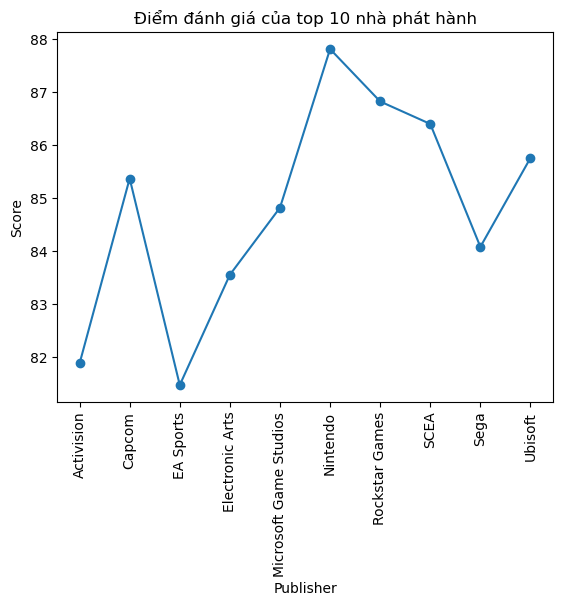

In [25]:
publisher_score
ticks = publisher_score.index.to_list()
values = publisher_score.values
plt.plot(ticks, values, marker = 'o')
plt.xlabel('Publisher')
plt.ylabel('Score')
plt.title('Điểm đánh giá của top 10 nhà phát hành')
plt.xticks(rotation=90)
plt.show()

Nitendo là nhà phát hành nhiều game nhất cũng là nhà phát hành có điểm đánh giá cao nhất. Trả lời câu hỏi này có thể giúp các nhà phát triển game lựa chọn nhà phát hành game tốt hơn.